<a href="https://colab.research.google.com/github/Najwaalya/MachineLearning_2025/blob/main/ML_JS04_Tugas_Praktikum_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTLIBRARY

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

## Buat Dataset make_moons

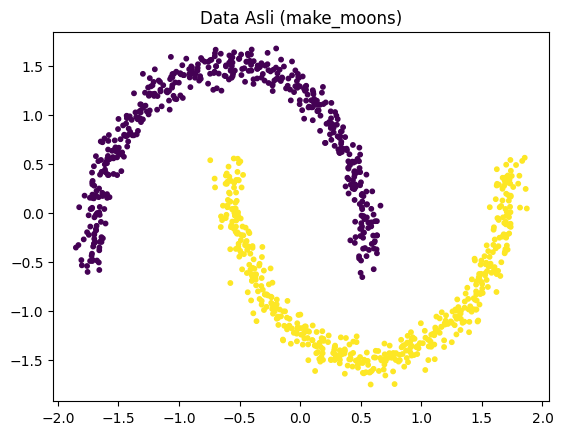

In [9]:
# Buat dataset 1000 sampel dengan noise 0.05
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi (biar skala data setara)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualisasi data asli
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', s=10)
plt.title("Data Asli (make_moons)")
plt.show()

## Jalankan DBSCAN

In [10]:
# Model DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X_scaled)

# Ambil label hasil clustering
labels = dbscan.labels_

## Hitung Jumlah Klaster dan Noise

In [11]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah klaster:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah klaster: 2
Jumlah noise: 0


## Evaluasi Model

In [12]:
# Pastikan tidak semua label = -1 agar metrik bisa dihitung
if n_clusters > 0:
    print("Homogeneity:", homogeneity_score(y, labels))
    print("Completeness:", completeness_score(y, labels))
    print("V-Measure:", v_measure_score(y, labels))
    print("ARI:", adjusted_rand_score(y, labels))
    print("AMI:", adjusted_mutual_info_score(y, labels))
    print("Silhouette:", silhouette_score(X_scaled, labels))
else:
    print("Semua titik dianggap noise, metrik tidak bisa dihitung.")

Homogeneity: 1.0
Completeness: 1.0
V-Measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


## Visualisasi Hasil DBSCAN

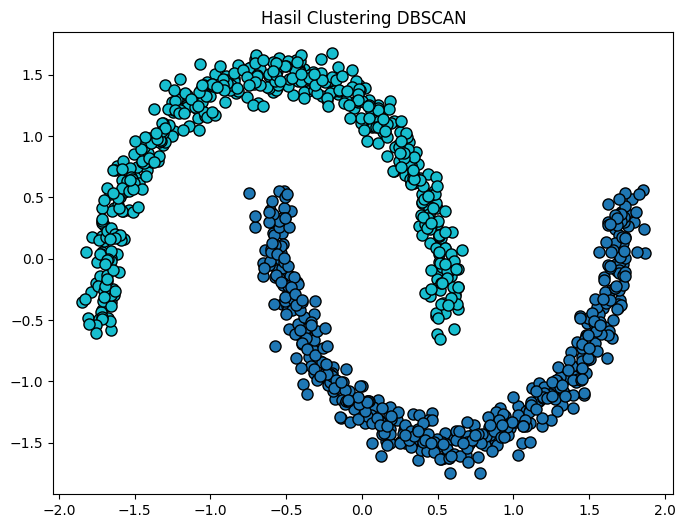

In [13]:
# Tentukan core sample mask
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Warna hitam untuk noise

    class_member_mask = (labels == k)

    # Titik core (besar)
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=8)

    # Titik non-core (kecil)
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=4)

plt.title("Hasil Clustering DBSCAN")
plt.show()

## Eksperimen Variasi Parameter

In [14]:
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        db.fit(X_scaled)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        print(f"\n=== eps={eps}, min_samples={min_s} ===")
        print("Jumlah klaster:", n_clusters)
        print("Jumlah noise:", n_noise)

        if n_clusters > 0:
            print("V-Measure:", v_measure_score(y, labels))
            print("ARI:", adjusted_rand_score(y, labels))
            print("Silhouette:", silhouette_score(X_scaled, labels))
        else:
            print("Semua titik dianggap noise.")


=== eps=0.05, min_samples=3 ===
Jumlah klaster: 69
Jumlah noise: 186
V-Measure: 0.25702116445185835
ARI: 0.03004350976613907
Silhouette: 0.11292949852882253

=== eps=0.05, min_samples=10 ===
Jumlah klaster: 3
Jumlah noise: 970
V-Measure: 0.04938947156339281
ARI: 0.0022825509789741014
Silhouette: -0.29419008256642176

=== eps=0.05, min_samples=20 ===
Jumlah klaster: 0
Jumlah noise: 1000
Semua titik dianggap noise.

=== eps=0.1, min_samples=3 ===
Jumlah klaster: 2
Jumlah noise: 14
V-Measure: 0.9427143195619004
ARI: 0.9721793882692121
Silhouette: 0.2516903011504368

=== eps=0.1, min_samples=10 ===
Jumlah klaster: 7
Jumlah noise: 57
V-Measure: 0.571132370522031
ARI: 0.5233989566001742
Silhouette: 0.16230611373347142

=== eps=0.1, min_samples=20 ===
Jumlah klaster: 6
Jumlah noise: 850
V-Measure: 0.15469327639657426
ARI: 0.016753669189074054
Silhouette: -0.3601946191938665

=== eps=0.3, min_samples=3 ===
Jumlah klaster: 2
Jumlah noise: 0
V-Measure: 1.0
ARI: 1.0
Silhouette: 0.391159853713840